## Objective
In this activity we will: 

set up the workspace
get to know the data
define sub-data sets
detect outliers
remove outliers.

In [10]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [11]:
# Importing data and making the instant check
sales=pd.read_csv('/Users/tunatuncay/Documents/Personal/LSE Data Analytics/Module 2/Week 6/LSE_DA201_Week_6_files/Data/raw_sales.csv', index_col=['datesold'], parse_dates=['datesold'])
print(sales.shape)
print(sales.dtypes)
sales.head()

(29580, 4)
postcode         int64
price            int64
propertyType    object
bedrooms         int64
dtype: object


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [12]:
# Checking for missing values
sales_na=sales[sales.isna().any(axis=1)]
print(sales_na.shape)
sales_na

(0, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,


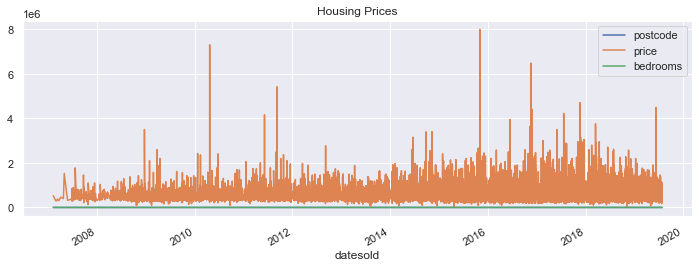

In [15]:
# Find the distribution of house prices over time and check for missing values.
# Plot the house prices as a time series.
# Plot the size.
sales.plot(figsize=(12, 4))

# Specify the legend and title of the plot.
plt.legend(loc='best')
plt.title('Housing Prices')
plt.show(block=False);

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64


Text(0.5, 1.0, 'Count of houses based on number of bedrooms')

<AxesSubplot:title={'center':'Count of houses based on number of bedrooms'}, xlabel='bedrooms', ylabel='count'>

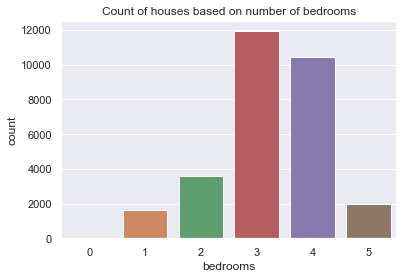

In [27]:
# Check for the count of houses based on the number of bedrooms and plot the houses by bedroom count.
# Count the number of values in a specified column of the DataFrame.
print(sales['bedrooms'].value_counts())

# Specify the legend and title of the plot.
plt.title('Count of houses based on number of bedrooms')

sns.countplot(x='bedrooms', data=sales)

In [30]:
# Creating subsets according to bedroom count
h1b=sales[sales['bedrooms']==1]
h2b=sales[sales['bedrooms']==2]
h3b=sales[sales['bedrooms']==3]
h4b=sales[sales['bedrooms']==4]
h5b=sales[sales['bedrooms']==5]

print(h1b.shape)
print(h2b.shape)
print(h3b.shape)
print(h4b.shape)
print(h5b.shape)

(1627, 4)
(3598, 4)
(11933, 4)
(10442, 4)
(1950, 4)


(array([613., 982.,  27.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  85000.,  304500.,  524000.,  743500.,  963000., 1182500.,
        1402000., 1621500., 1841000., 2060500., 2280000.]),
 <BarContainer object of 10 artists>)

(array([1.526e+03, 1.846e+03, 1.950e+02, 2.300e+01, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  96000.,  391400.,  686800.,  982200., 1277600., 1573000.,
        1868400., 2163800., 2459200., 2754600., 3050000.]),
 <BarContainer object of 10 artists>)

(array([1.0209e+04, 1.6280e+03, 8.4000e+01, 8.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  69000.,  710100., 1351200., 1992300., 2633400., 3274500.,
        3915600., 4556700., 5197800., 5838900., 6480000.]),
 <BarContainer object of 10 artists>)

(array([8.528e+03, 1.767e+03, 1.260e+02, 1.600e+01, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

(array([1.289e+03, 5.590e+02, 7.400e+01, 1.700e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 210000.,  919000., 1628000., 2337000., 3046000., 3755000.,
        4464000., 5173000., 5882000., 6591000., 7300000.]),
 <BarContainer object of 10 artists>)

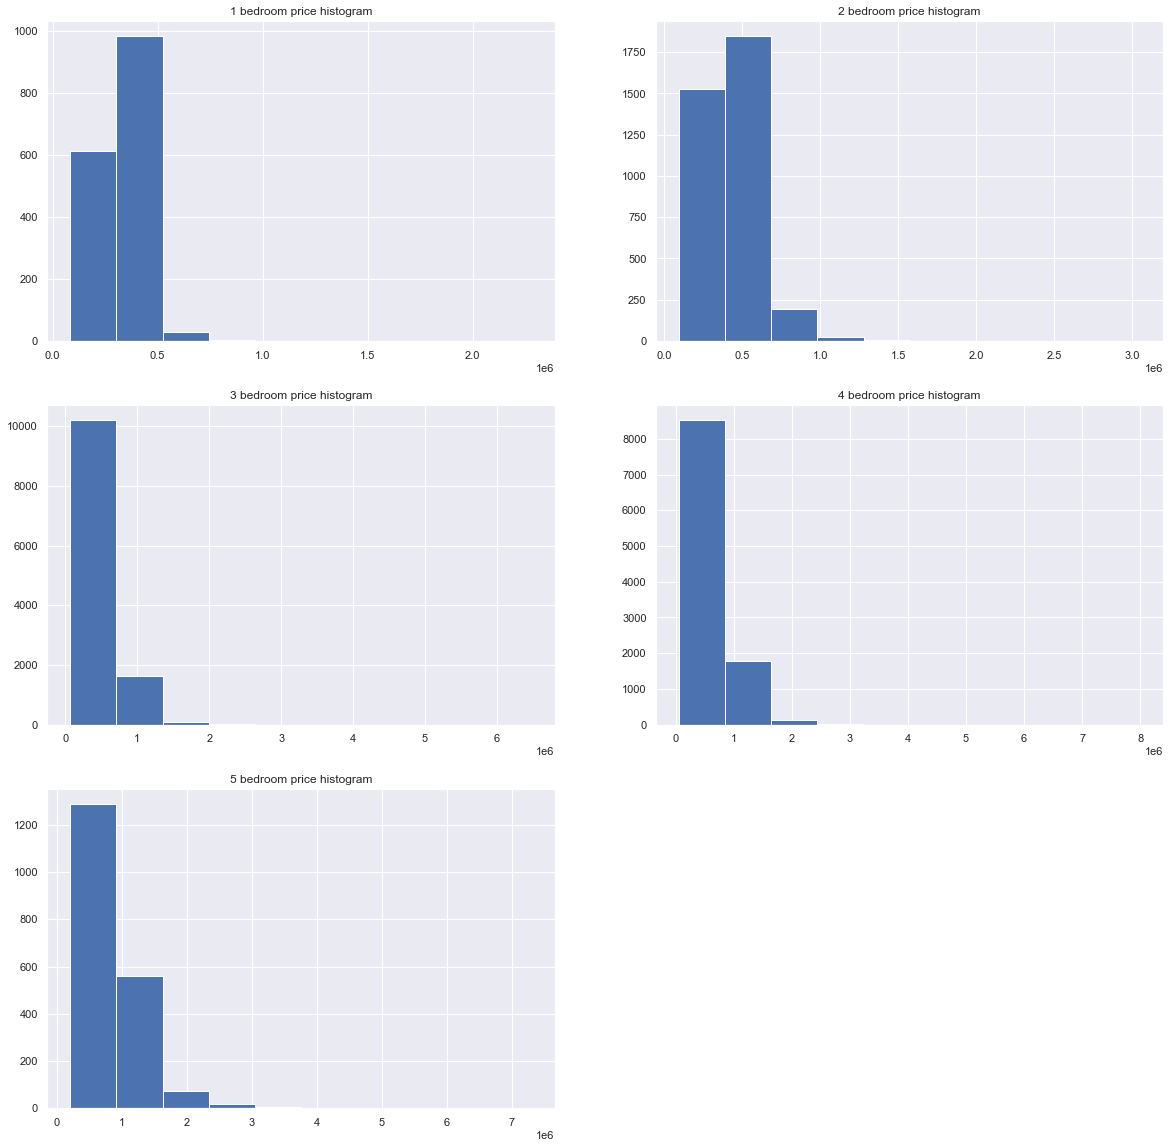

In [38]:
# Set the plot size.
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,20))

# 1 bedroom:
axes[0][0].hist(h1b['price'])
axes[0][0].title.set_text('1 bedroom price histogram')

# 2 bedroom:
axes[0][1].hist(h2b['price'])
axes[0][1].title.set_text('2 bedroom price histogram')

# 3 bedroom:
axes[1][0].hist(h3b['price'])
axes[1][0].title.set_text('3 bedroom price histogram')

# 4 bedroom
axes[1][1].hist(h4b['price'])
axes[1][1].title.set_text('4 bedroom price histogram')

# 5 bedroom:
axes[2][0].hist(h5b['price'])
axes[2][0].title.set_text('5 bedroom price histogram')


fig.delaxes(axes[2][1])

plt.show()

<AxesSubplot:xlabel='price'>

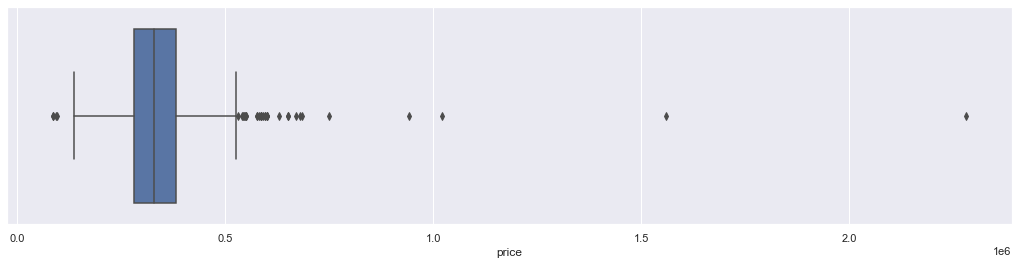

In [43]:
# Create a boxplot for the one-bedroom house sub-data set
# Set figure size.
fig = plt.figure(figsize=(18, 4))
sns.boxplot(x='price', data=h1b,whis=1.5)

In [46]:
# The columns you want to search for outliers in.
cols = ['price'] 

# Removing outliers in 1bedroom apartments
# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = h1b[cols].quantile(0.25) 
Q3 = h1b[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((h1b[cols] < (Q1 - 1.5 * IQR)) | (h1b[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our DataFrame based on condition.
h1b_non_outlier = h1b[condition]
h1b_non_outlier.shape

price    100250.0
dtype: float64

(1592, 4)

In [67]:
# The columns you want to search for outliers in.
cols = ['price']

# Removing outliers in 2bedroom apartments
# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = h2b[cols].quantile(0.25) 
Q3 = h2b[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((h2b[cols] < (Q1 - 1.5 * IQR)) | (h2b[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our DataFrame based on condition.
h2b_non_outlier = h2b[condition]
h2b_non_outlier.shape

price    140000.0
dtype: float64

(3387, 4)

In [68]:
# The columns you want to search for outliers in.
cols = ['price']

# Removing outliers in 3bedroom apartments
# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = h3b[cols].quantile(0.25) 
Q3 = h3b[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((h3b[cols] < (Q1 - 1.5 * IQR)) | (h3b[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our DataFrame based on condition.
h3b_non_outlier = h3b[condition]
h3b_non_outlier.shape

price    177500.0
dtype: float64

(11254, 4)

In [69]:
# The columns you want to search for outliers in.
cols = ['price']

# Removing outliers in 4bedroom apartments
# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = h4b[cols].quantile(0.25) 
Q3 = h4b[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((h4b[cols] < (Q1 - 1.5 * IQR)) | (h4b[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our DataFrame based on condition.
h4b_non_outlier = h4b[condition]
h4b_non_outlier.shape

price    230500.0
dtype: float64

(9772, 4)

In [70]:
# The columns you want to search for outliers in.
cols = ['price']

# Removing outliers in 5bedroom apartments
# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = h5b[cols].quantile(0.25) 
Q3 = h5b[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((h5b[cols] < (Q1 - 1.5 * IQR)) | (h5b[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our DataFrame based on condition.
h5b_non_outlier = h5b[condition]
h5b_non_outlier.shape

price    325000.0
dtype: float64

(1809, 4)

<AxesSubplot:xlabel='price'>

Text(0.5, 1.0, 'Box Plot Representation for 1Bedroom Houses')

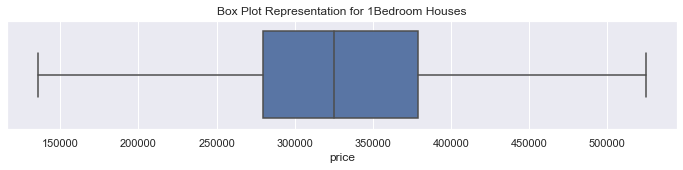

In [55]:
# Boxplot view after outlier removal
fig = plt.subplots(figsize=(12, 2))
sns.boxplot(x='price', data=h1b_non_outlier)
plt.title('Box Plot Representation for 1Bedroom Houses')

<AxesSubplot:xlabel='price'>

Text(0.5, 1.0, 'Box Plot Representation for 2Bedroom Houses')

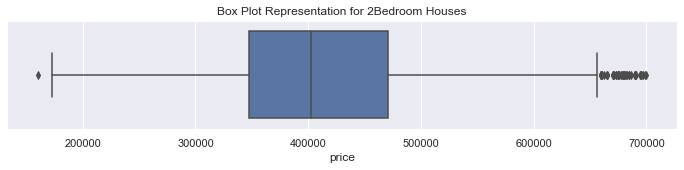

In [66]:
# Boxplot view after outlier removal
fig = plt.subplots(figsize=(12, 2))
sns.boxplot(x='price', data=h2b_non_outlier)
plt.title('Box Plot Representation for 2Bedroom Houses')

<AxesSubplot:xlabel='price'>

Text(0.5, 1.0, 'Box Plot Representation for 3Bedroom Houses')

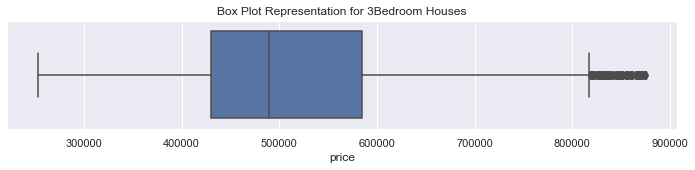

In [57]:
# Boxplot view after outlier removal
fig = plt.subplots(figsize=(12, 2))
sns.boxplot(x='price', data=h3b_non_outlier)
plt.title('Box Plot Representation for 3Bedroom Houses')

<AxesSubplot:xlabel='price'>

Text(0.5, 1.0, 'Box Plot Representation for 4Bedroom Houses')

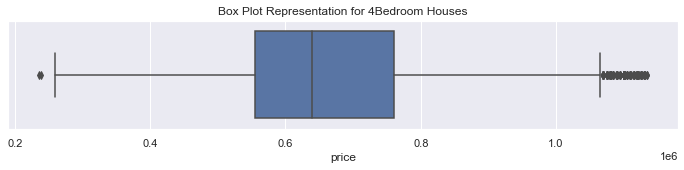

In [58]:
# Boxplot view after outlier removal
fig = plt.subplots(figsize=(12, 2))
sns.boxplot(x='price', data=h4b_non_outlier)
plt.title('Box Plot Representation for 4Bedroom Houses')

<AxesSubplot:xlabel='price'>

Text(0.5, 1.0, 'Box Plot Representation for 5Bedroom Houses')

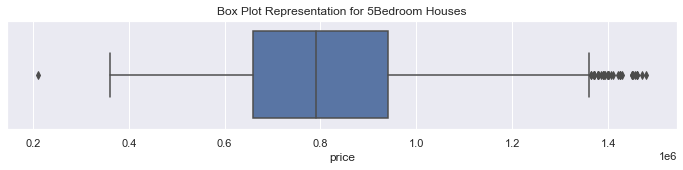

In [59]:
# Boxplot view after outlier removal
fig = plt.subplots(figsize=(12, 2))
sns.boxplot(x='price', data=h5b_non_outlier)
plt.title('Box Plot Representation for 5Bedroom Houses')